In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('dataset.csv', header=None)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Columns: 25089 entries, 0 to 25088
dtypes: float64(25088), int64(1)
memory usage: 287.1 MB


In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25079,25080,25081,25082,25083,25084,25085,25086,25087,25088
0,0,7.387117,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.842819,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.985980,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.000000,8.687142,0.0,15.406369,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
y = df.iloc[:, 0].values

print("Shape of target vector : ",y.shape)

Shape of target vector :  (1500,)


In [6]:
column_numbers = [x for x in range(df.shape[1])]  # list of columns' integer indices

column_numbers.remove(0) #removing column integer index 0
Features= df.iloc[:, column_numbers] #return all columns except the 0th column

In [7]:
Features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Columns: 25088 entries, 1 to 25088
dtypes: float64(25088)
memory usage: 287.1 MB


In [8]:
X=Features.values

In [9]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [10]:
# Train a Random Forest to determine feature importance
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X, y)

RandomForestClassifier(random_state=42)

In [11]:
# Get feature importances and select top 5000 features
feature_importances = random_forest.feature_importances_
top_5000_indices = np.argsort(feature_importances)[-5000:]  # Indices of top 5000 features
X_reduced = X[:, top_5000_indices]

In [12]:
feature_importances[:100]

array([6.48037081e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.99441289e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.20487027e-04, 2.60694961e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.46226627e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.15784297e-05, 0.00000000e+00,
       0.00000000e+00, 9.93343055e-05, 2.47682454e-05, 0.00000000e+00,
       1.11383273e-04, 0.00000000e+00, 0.00000000e+00, 1.91668306e-04,
      

In [13]:
top_5000_indices[:100]

array([1586, 1587, 7518, 7517, 7516, 7515, 7521, 7528, 7500, 7498, 1604,
       7476, 7475, 1605, 1606, 7474, 7473, 7472, 7471, 7470, 1608, 7469,
       7468, 1610, 1611, 7477, 7478, 7479, 7480, 1600, 7495, 7494, 7493,
       7492, 7491, 7490, 7499, 7489, 1601, 7486, 7485, 1602, 1603, 7482,
       7481, 7488, 7529, 7530, 7531, 7580, 7579, 7578, 7577, 1571, 7576,
       7575, 1572, 7573, 7572, 7571, 7570, 7569, 1573, 1574, 1570, 7581,
       7582, 7583, 7596, 1566, 7595, 1567, 7594, 7593, 7592, 7567, 7591,
       7589, 7588, 7587, 7586, 1568, 1569, 7584, 7590, 7566, 7565, 7564,
       1580, 7546, 7545, 7544, 1581, 7542, 7541, 1579, 7540, 7538, 7537,
       7536], dtype=int64)

In [14]:
# Save the reduced dataset to a new CSV file
reduced_df = pd.DataFrame(X_reduced)
reduced_df.insert(0, 'Target', y)  # Add the target column back
reduced_df.to_csv('reduced_dataset.csv', index=False, header=False)

In [15]:
reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Columns: 5001 entries, Target to 4999
dtypes: float64(5000), int64(1)
memory usage: 57.2 MB


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Assuming X (features) and y (target) are already defined
# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, stratify=y, random_state=42
)

# Display the number of samples and targets in each set
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


train_counts = dict(zip(*np.unique(y_train, return_counts=True)))
test_counts = dict(zip(*np.unique(y_test, return_counts=True)))


print(f"Training target distribution:\n{train_counts}")
print(f"Testing target distribution:\n{test_counts}")

Training samples: 1200, Testing samples: 300
Training target distribution:
{0: 600, 1: 600}
Testing target distribution:
{0: 150, 1: 150}


In [17]:
# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Display the classification report with 4 digits of precision
class_report = classification_report(y_test, y_pred, digits=4)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[144   6]
 [  0 150]]

Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.9600    0.9796       150
           1     0.9615    1.0000    0.9804       150

    accuracy                         0.9800       300
   macro avg     0.9808    0.9800    0.9800       300
weighted avg     0.9808    0.9800    0.9800       300



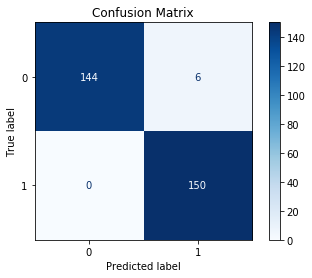

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline

# Use ConfusionMatrixDisplay for a visual representation
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues, values_format='d')  # 'd' ensures integer formatting
plt.title("Confusion Matrix")
plt.show()